In [ ]:
#from UCI database, 0.1% (200mb) of total songs (200G).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
sns.set_style('whitegrid')
from subprocess import check_output


In [2]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn import datasets, svm, metrics
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.utils import resample
import itertools
from sklearn.model_selection import GridSearchCV
from sklearn.manifold import TSNE

In [33]:
# load data
df = pd.read_csv('YearPredictionMSD.txt', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903


In [34]:
df.shape

(515345, 91)

In [48]:
df.columns = [str(c) for c in df.columns]

In [50]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903


In [52]:
# Group release years into decades
df['0'] = df['0'].apply(lambda year : year-(year%10))

In [53]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
0,2000,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2000,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2000,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2000,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2000,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903


Text(0.5, 1.0, 'Samples in the dataset/release decade')

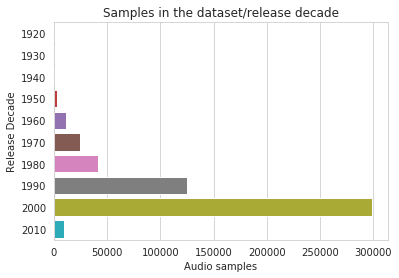

In [55]:
sns.countplot(y="0", data=df)
plt.xlabel("Audio samples")
plt.ylabel("Release Decade")
plt.title("Samples in the dataset/release decade")

In [ ]:
# We have over 500k samples, but there are too few samples for some categories and too many for others. 
# Lets pick equal number of random samples for each category (release decade). 
# Also we have too few samples of songs older than 1950. We will exclude these for now and revisit this later.

In [56]:
print("(Samples, Features) {}".format(df.iloc[:,1:].shape))
df.iloc[:,1:].describe()

(Samples, Features) (515345, 90)


,1,2,3,4,5,6,7,8,9,10,...,81,82,83,84,85,86,87,88,89,90
count,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,...,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000
mean,43.387126,1.289554,8.658347,1.164124,-6.553601,-9.521975,-2.391089,-1.793236,3.727876,1.882385,...,15.755406,-73.461500,41.542422,37.934119,0.315751,17.669213,-26.315336,4.458641,20.035136,1.329105
std,6.067558,51.580351,35.268585,16.322790,22.860785,12.857751,14.571873,7.963827,10.582861,6.530232,...,32.099635,175.618889,122.228799,95.050631,16.161764,114.427905,173.977336,13.346557,185.558247,22.088576
min,1.749000,-337.092500,-301.005060,-154.183580,-181.953370,-81.794290,-188.214000,-72.503850,-126.479040,-41.631660,...,-437.722030,-4402.376440,-1810.689190,-3098.350310,-341.789120,-3168.924570,-4319.992320,-236.039260,-7458.378150,-381.424430
25%,39.954690,-26.059520,-11.462710,-8.487500,-20.666450,-18.440990,-10.780600,-6.468420,-2.293660,-2.444850,...,-1.812650,-139.555160,-20.986900,-4.669540,-6.781590,-31.580610,-101.530300,-2.566090,-59.509270,-8.820210
50%,44.258500,8.417850,10.476320,-0.652840,-6.007770,-11.188390,-2.046670,-1.736450,3.822310,1.783520,...,9.171850,-53.090060,28.791060,33.623630,0.820840,15.598470,-21.204120,3.117640,7.759730,0.053050
75%,47.833890,36.124010,29.764820,8.787540,7.741870,-2.388960,6.508580,2.913450,9.961820,6.147220,...,26.274480,13.478730,89.661770,77.785800,8.470990,67.794960,52.389330,9.967740,86.351610,9.679520
max,61.970140,384.065730,322.851430,335.771820,262.068870,166.236890,172.402680,126.741270,146.297950,60.345350,...,840.973380,4469.454870,3210.701700,1734.079690,260.544900,3662.065650,2833.608950,463.419500,7393.398440,677.899630


# scaling min-max: val = (v-min)/(max-v)

In [58]:
df.iloc[:,1:] = (df.iloc[:,1:]-df.iloc[:,1:].min())/(df.iloc[:,1:].max() - df.iloc[:,1:].min())
df.iloc[:,1:].describe()

,1,2,3,4,5,6,7,8,9,10,...,81,82,83,84,85,86,87,88,89,90
count,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,...,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000
mean,0.691420,0.469220,0.496370,0.317065,0.395025,0.291384,0.515292,0.354893,0.477338,0.426704,...,0.354641,0.487939,0.368868,0.649008,0.567965,0.466491,0.600212,0.343834,0.503537,0.361319
std,0.100755,0.071524,0.056533,0.033315,0.051486,0.051839,0.040408,0.039970,0.038797,0.064036,...,0.025103,0.019795,0.024342,0.019669,0.026832,0.016751,0.024320,0.019081,0.012494,0.020852
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.634423,0.431296,0.464117,0.297366,0.363241,0.255425,0.492028,0.331428,0.455263,0.384271,...,0.340902,0.480489,0.356416,0.640192,0.556182,0.459281,0.589698,0.333791,0.498181,0.351738
50%,0.705890,0.479105,0.499284,0.313357,0.396254,0.284665,0.516247,0.355178,0.477685,0.425735,...,0.349492,0.490235,0.366329,0.648116,0.568804,0.466188,0.600926,0.341917,0.502710,0.360114
75%,0.765261,0.517524,0.530202,0.332624,0.427220,0.320143,0.539971,0.378515,0.500192,0.468526,...,0.362867,0.497739,0.378451,0.657254,0.581505,0.473829,0.611214,0.351711,0.508002,0.369201
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [63]:
df_t = df[df['0']>1940]
min_samples = df_t['0'].value_counts().min()
decades = df_t['0'].unique()
df_sampled = pd.DataFrame(columns=df_t.columns)
for decade in decades:
    df_sampled = df_sampled.append(df_t[df_t['0']==decade].sample(min_samples))
df_sampled['0'] = df_sampled['0'].astype(int)

Text(0.5, 1.0, 'Downsampled dataset')

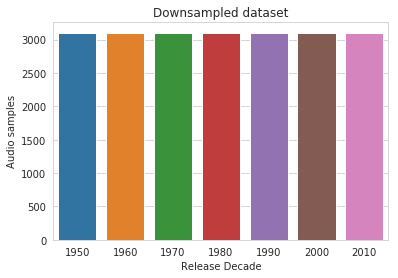

In [65]:
sns.countplot(x="0", data=df_sampled)
plt.ylabel("Audio samples")
plt.xlabel("Release Decade")
plt.title("Downsampled dataset")

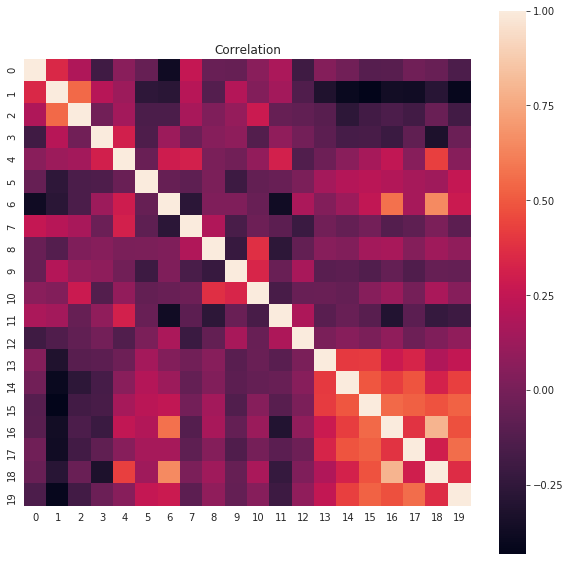

In [66]:
# Correlation between the release decade and features
corr = df_sampled.iloc[:,:20].corr()
fig, ax = plt.subplots(figsize=(10,10)) 
plt.title("Correlation")
sns.heatmap(corr, square=True)
plt.show()

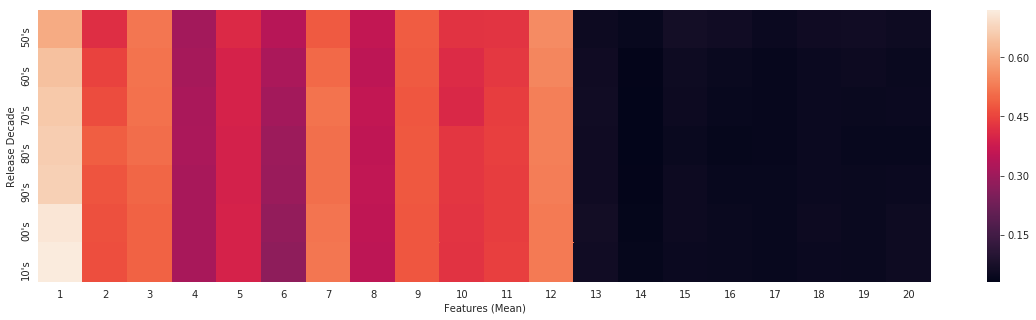

In [68]:
# How do features differ by release decade?
columns = df_sampled.groupby(['0']).mean().columns
labels = ["{:02d}'s".format(l%100) for l in sorted(df_sampled['0'].unique())]
fig, ax = plt.subplots(figsize=(20,5)) 
sns.heatmap(df_sampled.groupby(['0']).mean().iloc[:,0:20], yticklabels=labels)
plt.ylabel("Release Decade")
plt.xlabel("Features (Mean)")
plt.show()

/home/chenming/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


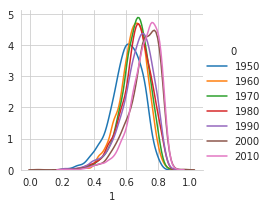

/home/chenming/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


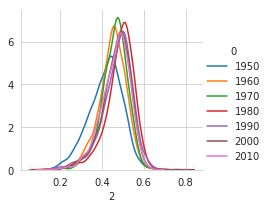

/home/chenming/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


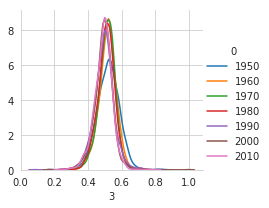

/home/chenming/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


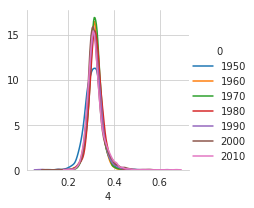

/home/chenming/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


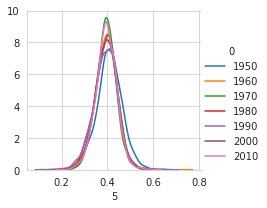

/home/chenming/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


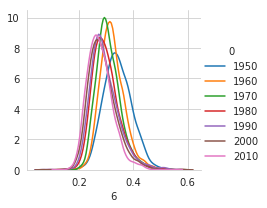

/home/chenming/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


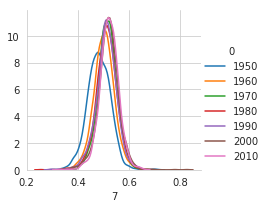

/home/chenming/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


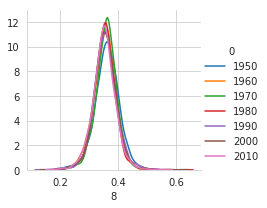

/home/chenming/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


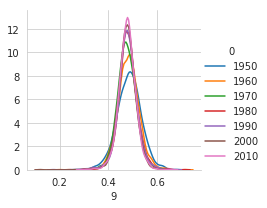

/home/chenming/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


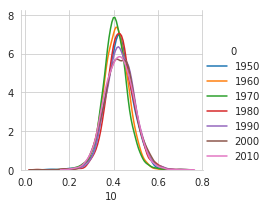

In [75]:
for component in df_sampled.columns[1:11]:
    sns.FacetGrid(df_sampled, hue="0", size=3).map(sns.kdeplot, component).add_legend()
    plt.show()

In [77]:
#Dimensionality Reduction for Visualization
#It is hard to visualize this high dimensional data (90 features). 
#Lets explore couple of techniques for translating high-dimensional data into lower dimensional data. 
#Purpose of dimensionality reduction here is visualization alone.

#Use PCA to reduce to 20 principal components.

In [78]:
X = df_sampled.iloc[:,1:].values
y = df_sampled.iloc[:,0].values
print("X ", X.shape, ", y ", y.shape)

X  (21714, 90) , y  (21714,)


In [79]:
pca = PCA(n_components=20).fit(X)
X_pca = pca.transform(X)

In [80]:
principal_components = []
samples, features = X_pca.shape
for m in range(1, features+1):
    principal_components.append("Principal Component {}".format(m))
cols = principal_components+["Release Decade"]    
df_pca = pd.DataFrame(np.append(X_pca, y.reshape(samples,1), axis=1), columns=cols)
df_pca["Release Decade"] = df_pca["Release Decade"].astype(int)
print("df_pca.shape = ",df_pca.shape)

df_pca.shape =  (21714, 21)


/home/chenming/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


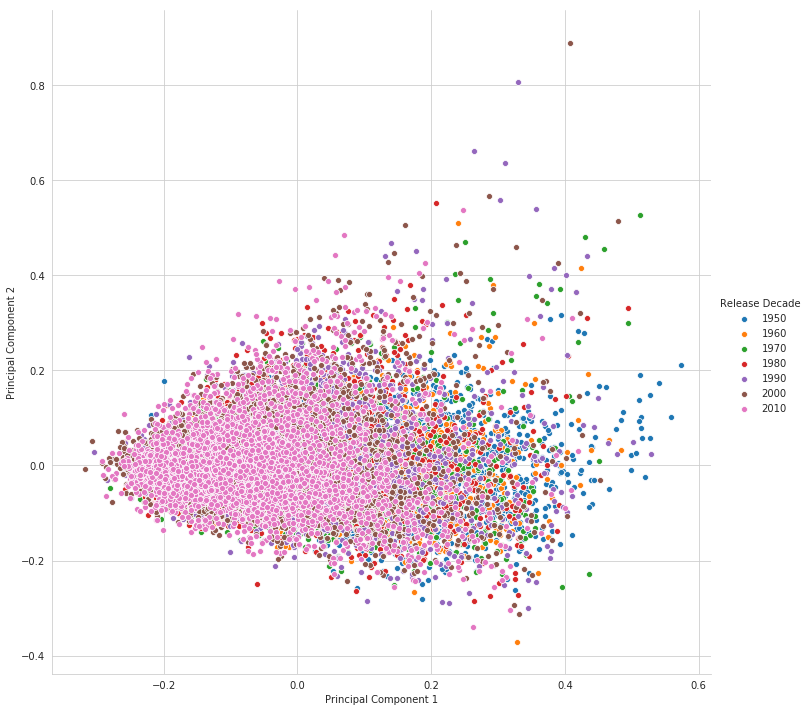

In [81]:
sns.pairplot(df_pca, hue="Release Decade",x_vars="Principal Component 1",y_vars="Principal Component 2", size=10)

In [83]:
tsne_samples = df_pca.shape[0]
tsne = TSNE(n_components=2, verbose=2, perplexity=50, n_iter=1000)
tsne_results = tsne.fit_transform(df_pca.iloc[:tsne_samples,:-1])

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 21714 samples in 0.023s...
[t-SNE] Computed neighbors for 21714 samples in 14.021s...
[t-SNE] Computed conditional probabilities for sample 1000 / 21714
[t-SNE] Computed conditional probabilities for sample 2000 / 21714
[t-SNE] Computed conditional probabilities for sample 3000 / 21714
[t-SNE] Computed conditional probabilities for sample 4000 / 21714
[t-SNE] Computed conditional probabilities for sample 5000 / 21714
[t-SNE] Computed conditional probabilities for sample 6000 / 21714
[t-SNE] Computed conditional probabilities for sample 7000 / 21714
[t-SNE] Computed conditional probabilities for sample 8000 / 21714
[t-SNE] Computed conditional probabilities for sample 9000 / 21714
[t-SNE] Computed conditional probabilities for sample 10000 / 21714
[t-SNE] Computed conditional probabilities for sample 11000 / 21714
[t-SNE] Computed conditional probabilities for sample 12000 / 21714
[t-SNE] Computed conditional probabilities for s

In [84]:
df_tsne = pd.DataFrame(np.append(tsne_results, 
                                 df_pca.iloc[:tsne_samples,-1].values.reshape(tsne_results.shape[0],1), 
                                 axis=1), 
                       columns=["t-SNE Component 1","t-SNE Component 2","Release Decade"])
df_tsne["Release Decade"] = df_tsne["Release Decade"].astype(int)

/home/chenming/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


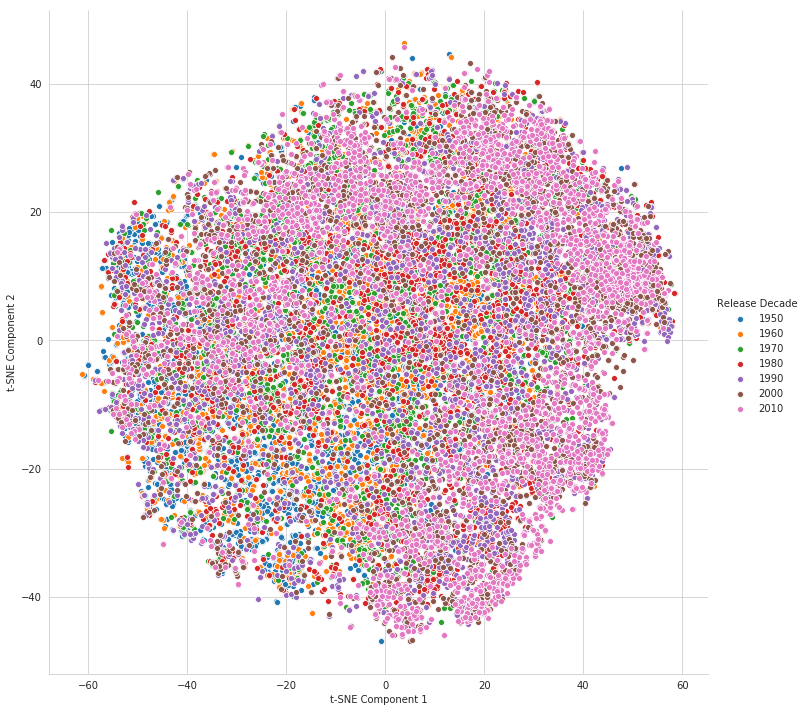

In [86]:
sns.pairplot(df_tsne, hue="Release Decade",x_vars="t-SNE Component 1",y_vars="t-SNE Component 2", size=10)

/home/chenming/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


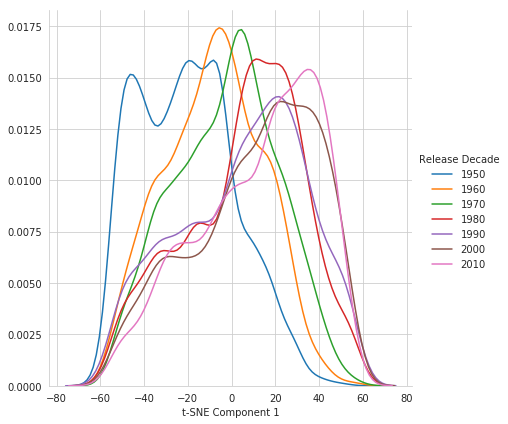

/home/chenming/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


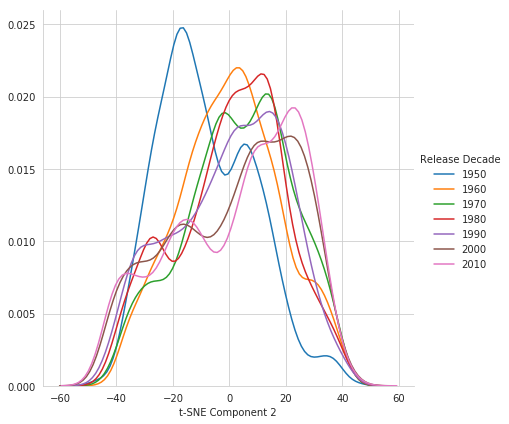

In [87]:
for component in df_tsne.columns[:-1]:
    sns.FacetGrid(df_tsne, hue="Release Decade", size=6) \
       .map(sns.kdeplot, component) \
       .add_legend()
    plt.show()

/home/chenming/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


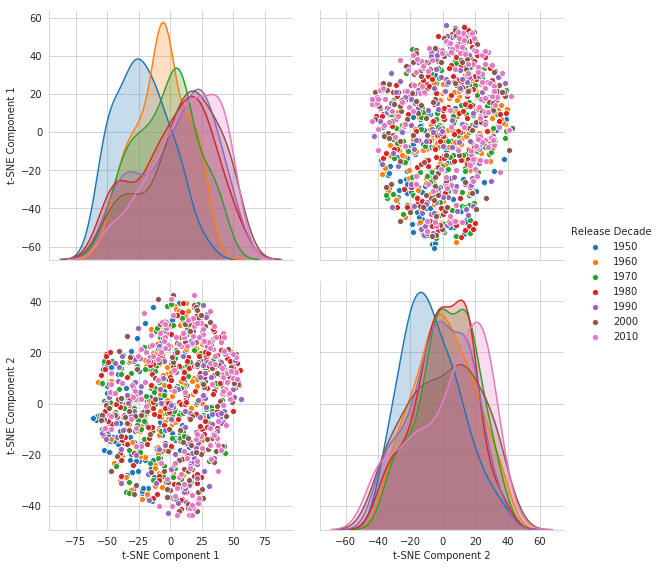

In [88]:
sns.pairplot(data=df_tsne.sample(1000), hue="Release Decade", vars=df_tsne.columns[:-1], size=4)

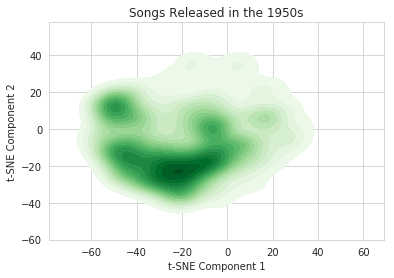

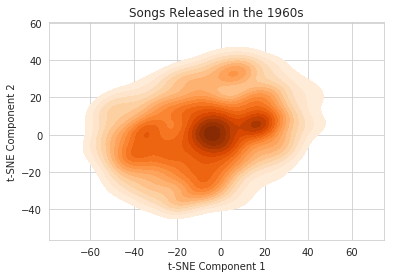

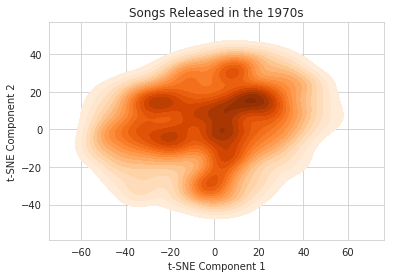

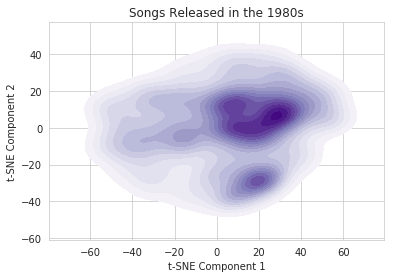

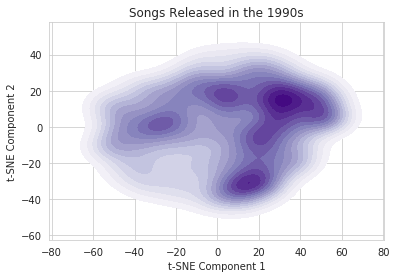

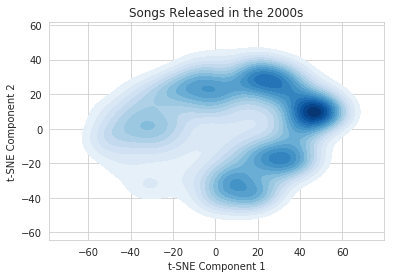

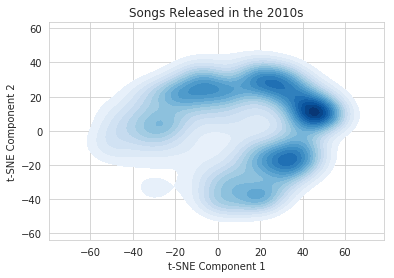

In [89]:
col = ["Greens", "Oranges", "Oranges","Purples", "Purples", "Blues", "Blues"]
for idx, year in enumerate([1950,1960,1970,1980,1990,2000,2010]):
    df_tsne_year = df_tsne[df_tsne['Release Decade']==year]
    sns.kdeplot(df_tsne_year['t-SNE Component 1'].values, df_tsne_year['t-SNE Component 2'].values,cmap=col[idx], shade=True, shade_lowest=False, n_levels=20)
    plt.xlabel("t-SNE Component 1")
    plt.ylabel("t-SNE Component 2")
    plt.title("Songs Released in the {}s".format(year))
    plt.show()

## Classification
Based on the analysis so far, there doesn't appear to be clear separation between output classes. Lets attempt classification using SVC. We will use complete set of features here and not the principal components visualized earlier.

Split the dataset into training and test set. Use grid search to find the best parameters for SVC.

In [90]:
df_sampled = shuffle(df_sampled)
df_train, df_test = train_test_split(df_sampled, test_size=0.3)

In [91]:
X_train = df_train.iloc[:,1:].values 
y_train = df_train.iloc[:,0].values
print("X_train ", X_train.shape, ", y_train ", y_train.shape)

X_train  (15199, 90) , y_train  (15199,)


In [92]:
#grid_search = GridSearchCV(svm.SVC(),
#                           {'kernel':['linear', 'rbf','poly'], 
#                            'C': [1, 5, 10,15,20,25], 
#                            'gamma' : [1, 5, 10,15,20]
#                           },
#                           cv=None)
#grid_search.fit(X_train, y_train)
#clf = grid_search.best_estimator_
#print(clf)
clf = svm.SVC(kernel='rbf',C=10,gamma=5);
clf.fit(X_train, y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=5, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [93]:
tst = df_test
X_test = tst.iloc[:,1:].values 
y_test = tst.iloc[:,0].values
expected = y_test
predicted = clf.predict(X_test)
print("Classification report for classifier %s:\n%s\n"
      % (clf, metrics.classification_report(expected, predicted)))
cnf_matrix = metrics.confusion_matrix(expected, predicted)

Classification report for classifier SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=5, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False):
              precision    recall  f1-score   support

        1950       0.60      0.76      0.67       912
        1960       0.43      0.49      0.46       917
        1970       0.46      0.47      0.47       928
        1980       0.49      0.47      0.48       932
        1990       0.39      0.29      0.33       940
        2000       0.39      0.33      0.36       966
        2010       0.46      0.50      0.48       920

    accuracy                           0.47      6515
   macro avg       0.46      0.47      0.46      6515
weighted avg       0.46      0.47      0.46      6515




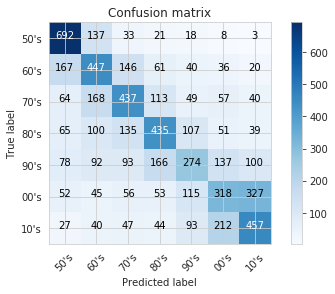

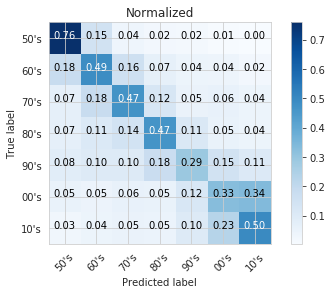

In [95]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
labels = sorted(df_test['0'].unique())
plot_confusion_matrix(cnf_matrix, classes=["{:02d}'s".format(label%100) for label in labels],
                      title='Confusion matrix')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["{:02d}'s".format(label%100) for label in labels], normalize=True,
                      title='Normalized')

plt.show()

# Gradient boosting and Random forest

In [97]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score

In [100]:
train_features = df_sampled.drop("0", axis=1)
train_labels =df_sampled['0']


In [101]:
lgbm = LGBMClassifier()
rf = RandomForestClassifier()
scaler = StandardScaler()
pipeline1 = Pipeline([('scaler', scaler), ('lgbm', lgbm)])
pipeline2 = Pipeline([('scaler', scaler), ('rf', rf)])
print( cross_val_score(pipeline1, train_features, train_labels, cv=5))
print( cross_val_score(pipeline2, train_features, train_labels, cv=5))

[0.45 0.44 0.44 0.44 0.44]
[0.32 0.31 0.32 0.33 0.32]


# Neural Nets Sequential Feedforward Networks


In [102]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
import keras as kr
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers.core import Dense
from sklearn.utils import shuffle
from sklearn.model_selection import StratifiedShuffleSplit

Using TensorFlow backend.


In [116]:
df_train, df_test = train_test_split(df_sampled, test_size=0.3)
train_features = df_train.drop("0", axis=1)
test_features = df_test.drop("0", axis=1)

label_count = len(df_test['0'].unique())
X_train = df_train.iloc[:,1:].values 
y_train = df_train.iloc[:,0].values
X_test = df_test.iloc[:,1:].values 
y_test = df_test.iloc[:,0].values

lb = LabelBinarizer()
trainY = lb.fit_transform(y_train)
testY = lb.transform(y_test)
train_features, trainY = shuffle(train_features, trainY)
scaler = StandardScaler()
train_standardized = scaler.fit_transform(train_features)
sss = StratifiedShuffleSplit(n_splits=2, test_size=0.5, random_state=0)


In [111]:
def get_network():
    model = kr.models.Sequential()
    model.add(Dense(20, input_shape=(train_features.shape[1],), activation="relu"))
    model.add(Dense(20, activation="relu"))
    model.add(Dense(label_count, activation="softmax"))
    opt = "adam"
    model.compile(loss= "categorical_crossentropy", optimizer=opt, metrics=["accuracy"], )
    return model

In [112]:
model = get_network()
scikit_net= KerasClassifier(build_fn=get_network, epochs=10, batch_size=40)
print( cross_val_score(scikit_net, train_features, trainY, cv=5))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
12159/12159 [==============================] - 3s 275us/step - loss: 1.9465 - acc: 0.1533
Epoch 2/10
12159/12159 [==============================] - 1s 106us/step - loss: 1.9399 - acc: 0.1778
Epoch 3/10
12159/12159 [==============================] - 1s 105us/step - loss: 1.9138 - acc: 0.2096
Epoch 4/10
12159/12159 [==============================] - 1s 108us/step - loss: 1.8603 - acc: 0.2270
Epoch 5/10
12159/12159 [==============================] - 1s 105us/step - loss: 1.8160 - acc: 0.2482
Epoch 6/10
12159/12159 [==============================] - 1s 105us/step - loss: 1.7901 - acc: 0.2712
Epoch 7/10
12159/12159 [==============================] - 1s 103us/step - loss: 1.7702 - acc: 0.2767
Epoch 8/10
12159/12159 [==============================] - 1s 105us/step - loss: 1.7640 - acc: 0.2776
Epoch 9/10
12159/12159 [==============================] - 1s 102us/step 

In [118]:
from sklearn.metrics import accuracy_score
print("LGB accuracy")
pipeline1.fit(train_features, y_train)
print(accuracy_score(pipeline1.predict(test_features), y_test))
print("RF accuracy")
pipeline2.fit(train_features, y_train)
print(accuracy_score(pipeline2.predict(test_features), y_test))
model.fit(train_features, trainY, batch_size=40, epochs=5)
model.evaluate(test_features, testY)

LGB accuracy
0.14458940905602455
RF accuracy
0.14213353798925557
Epoch 1/5
15199/15199 [==============================] - 2s 129us/step - loss: 1.9456 - acc: 0.1588
Epoch 2/5
15199/15199 [==============================] - 2s 108us/step - loss: 1.9279 - acc: 0.1934
Epoch 3/5
15199/15199 [==============================] - 2s 111us/step - loss: 1.8785 - acc: 0.2325
Epoch 4/5
15199/15199 [==============================] - 2s 108us/step - loss: 1.8202 - acc: 0.2580
Epoch 5/5
6515/6515 [==============================] - 0s 57us/step


[1.7700069921344221, 0.2681504220662443]